In [1029]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
car=pd.read_csv('quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [1030]:
car.shape

(892, 6)

In [1031]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [1032]:
backup=car.copy()

In [1033]:
car=car[car['year'].str.isnumeric()]

In [1034]:
car['year']=car['year'].astype(int)

In [1035]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [1036]:
car=car[car['Price']!='Ask For Price']

In [1037]:
car['Price']=car['Price'].str.replace(',','').astype(int)

C:\Users\sanskar agrawal\AppData\Local\Temp\ipykernel_11944\2327187584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price']=car['Price'].str.replace(',','').astype(int)


In [1038]:
car['kms_driven']=car['kms_driven'].str.split(" ").str.get(0).str.replace(",","")

C:\Users\sanskar agrawal\AppData\Local\Temp\ipykernel_11944\1486019583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].str.split(" ").str.get(0).str.replace(",","")


In [1039]:
car=car[car['kms_driven'].str.isnumeric()]

In [1040]:
car['kms_driven']=car['kms_driven'].astype(int)

In [1041]:
car['kms_driven']=car['kms_driven'].dropna()

In [1042]:
car.shape

(817, 6)

In [1043]:
car['name']=car['name'].str.split().str.slice(0,3).str.join(" ")

In [1044]:
car=car.reset_index(drop=True)

In [1045]:
car.to_csv("cleaned_car_data.csv")

In [1046]:
car.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [1047]:
car=car[car['Price']<6000000]

In [1048]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sanskar agrawal\AppData\Local\Temp\ipykernel_11944\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


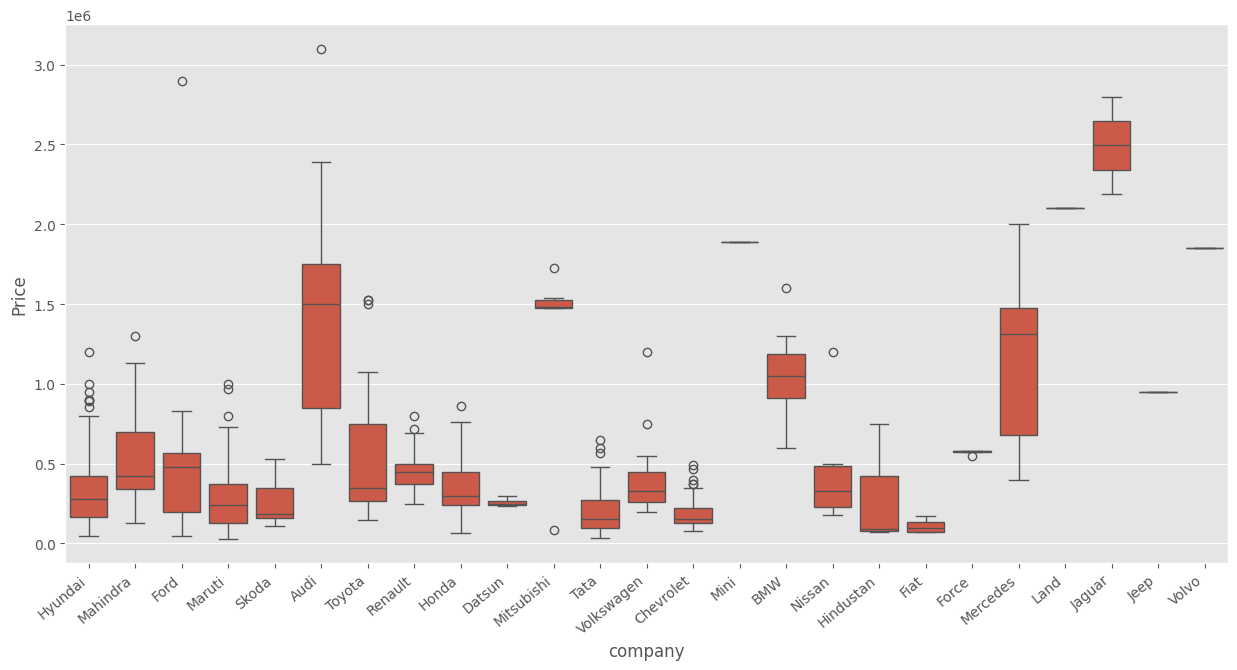

In [1049]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Axes: xlabel='fuel_type', ylabel='Price'>

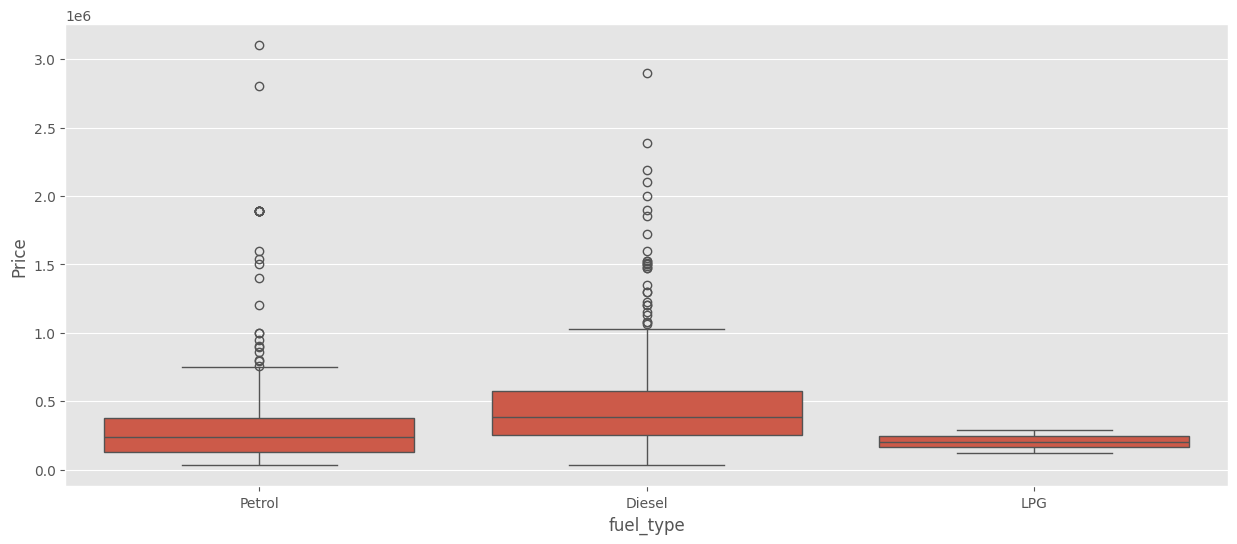

In [1050]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='fuel_type',y='Price',data=car)

<Axes: xlabel='kms_driven', ylabel='Price'>

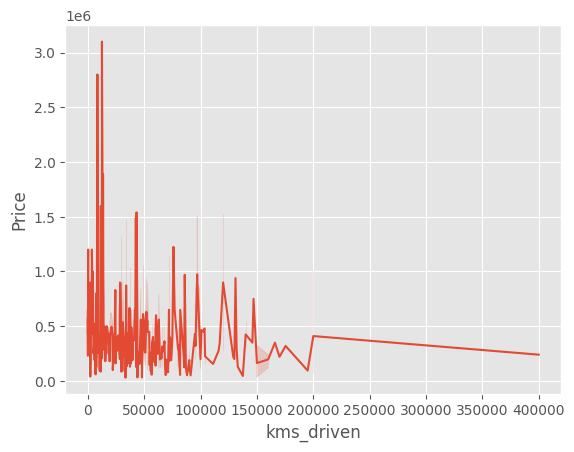

In [1051]:
sns.lineplot(x='kms_driven',y='Price',data=car)

In [1052]:
x=car[["name",'company','year','kms_driven','fuel_type']]
y=car["Price"]

In [1053]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [1054]:
lr=LinearRegression()

In [1055]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=652)

In [1056]:
text_features=['name','company','fuel_type']
num_features=['year','kms_driven']

In [1057]:
from sklearn.pipeline import Pipeline

In [1058]:
text_transformer=Pipeline(steps=[('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [1059]:
from sklearn.compose import ColumnTransformer

In [1060]:
preprocessor=ColumnTransformer(transformers=[('text',text_transformer,text_features)])

In [1061]:
from sklearn.ensemble import RandomForestRegressor

In [1062]:
from sklearn.linear_model import LinearRegression

In [1063]:
model_pipeline=Pipeline(steps=[('preprocessor',preprocessor),("regressor",LinearRegression())])

In [1064]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regressor', LinearRegression())])

In [1065]:
y_pred=model_pipeline.predict(x_test)

In [1067]:
r2_score(y_test,y_pred)

0.9192561069440734

In [1069]:
import joblib

In [1070]:
joblib.dump(model_pipeline,"price_model_pipeline.pkl")

['price_model_pipeline.pkl']